In [1]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model # Functional인 경우에는 Model을 불러옴!
from tensorflow.keras.layers import Dense

# Sequential Model일 경우

model_seq = Sequential()

model_seq.add(Dense(32, activation='relu', input_shape=(64, )))
model_seq.add(Dense(32, activation='relu'))
model_seq.add(Dense(10, activation='softmax'))

model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


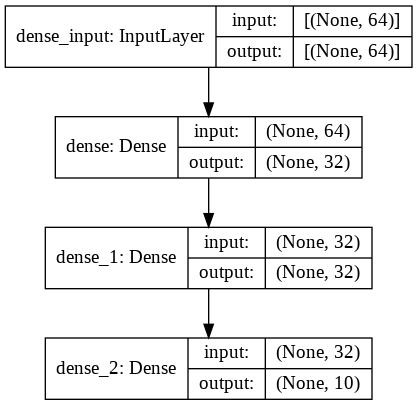

In [2]:
from tensorflow.keras.utils import plot_model

plot_model(model_seq, show_shapes=True)

In [3]:
# Funtional Model일 경우

input_tensor = Input(shape=(64, ))
x = Dense(32, activation='relu')(input_tensor)
x = Dense(32, activation='relu')(x)
output_tensor = Dense(10, activation='softmax')(x)

model_func = Model(input_tensor, output_tensor)

model_func.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


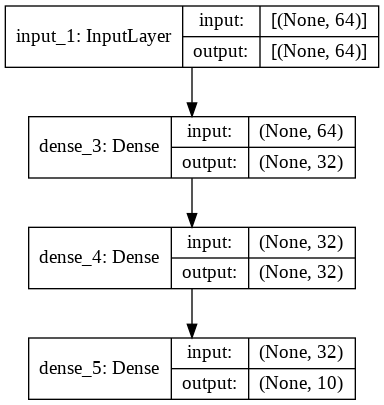

In [4]:
from tensorflow.keras.utils import plot_model

plot_model(model_func, show_shapes=True)

In [6]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, concatenate

Text_size = 10000
Question_size = 10000
Answer_size = 500

Input_text = Input(shape=(None, ), dtype='int32', name='text')
Embedding_text = Embedding(Text_size, 64)(Input_text)
LSTM_text = LSTM(32)(Embedding_text)

Input_question = Input(shape=(None, ), dtype='int32', name='question')
Embedding_question = Embedding(Question_size, 64)(Input_question)
LSTM_question = LSTM(64)(Embedding_question)

Concat_text_question = concatenate([LSTM_text, LSTM_question], axis=-1)

Dense_final = Dense(Answer_size, activation='softmax')(Concat_text_question)

model = Model([Input_text, Input_question], Dense_final)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
question (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 64)     640000      text[0][0]                       
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 64)     640000      question[0][0]                   
____________________________________________________________________________________________

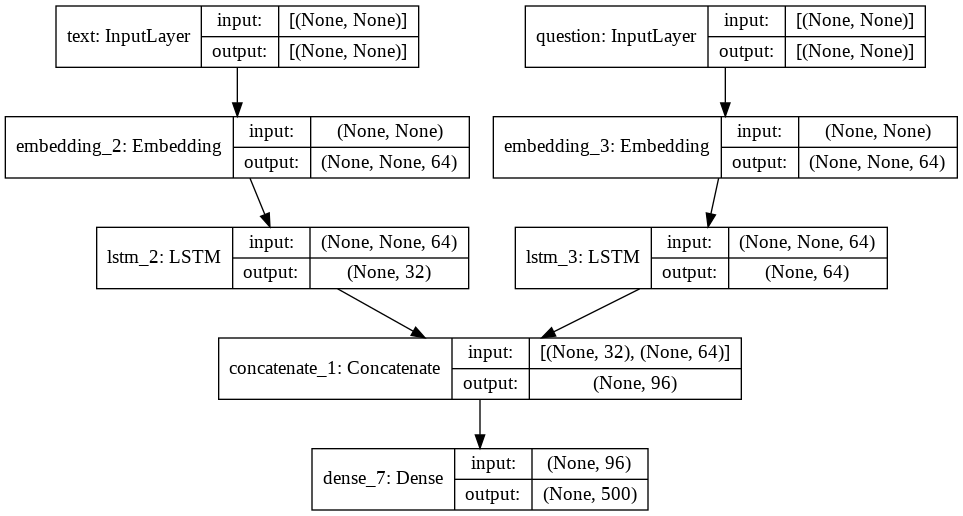

In [7]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [8]:
model.fit(
    [text, question],
    answer,
    epochs=10,
    batch_size=128
)

# or

model.fit(
    {
        'text': text,
        'question': question
    },
    answer,
    epochs=10,
    batch_size=128
)

NameError: ignored

In [10]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D


Voca_size = 50000
IncomeGroups_cnt = 10

Input_post = Input(shape=(None, ), dtype='int32', name='post')
Embedding_post = Embedding(Voca_size, 256)(Input_post)

x = Conv1D(128, 5, activation='relu')(Embedding_post)
x = MaxPooling1D(5)(x)

x = Conv1D(256, 5, activation='relu')(x)
x = Conv1D(256, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)

x = Conv1D(256, 5, activation='relu')(x)
x = Conv1D(256, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)

x = Dense(128, activation='relu')(x)

Dense_age = Dense(1, name='age')(x)
Dense_income = Dense(IncomeGroups_cnt, activation='softmax', name='income')(x)
Dense_gender = Dense(1, activation='sigmoid', name='gender')(x)

model = Model(Input_post, [Dense_age, Dense_income, Dense_gender])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
post (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, None, 256)    12800000    post[0][0]                       
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, None, 128)    163968      embedding_5[0][0]                
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, None, 128)    0           conv1d_2[0][0]                   
____________________________________________________________________________________________

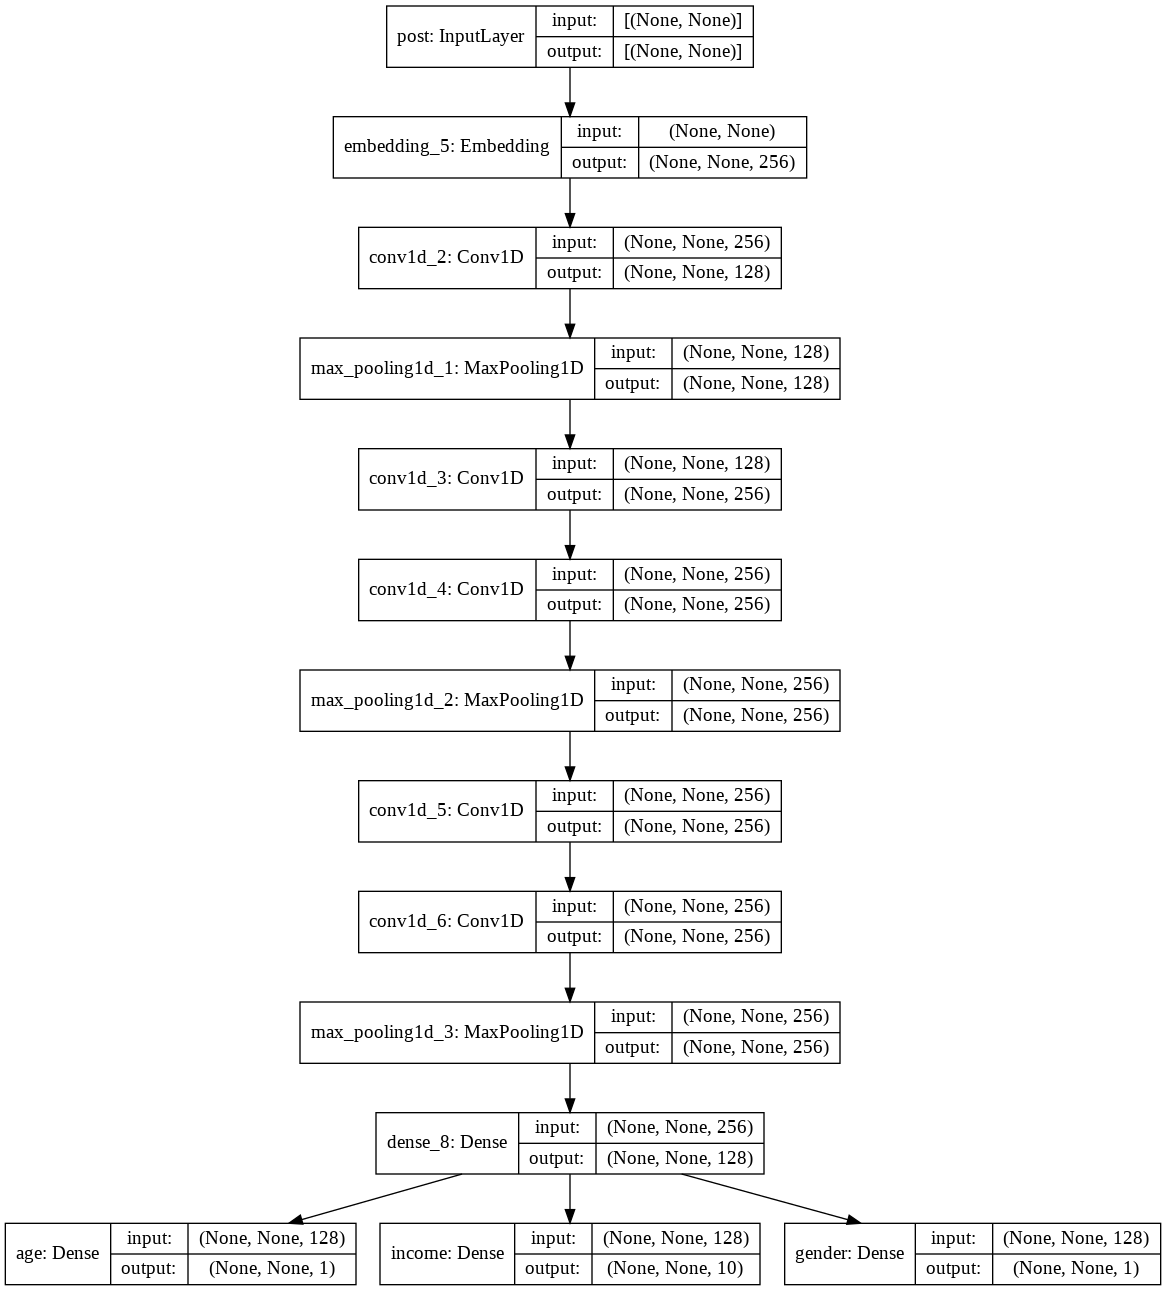

In [11]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [12]:
model.compile(
    optimizer='rmsprop',
    loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
    loss_weights=[0.25, 1, 10]
)

# or

model.compile(
    optimizer='rmsprop',
    loss={
        'age': 'mse',
        'income': 'categorical_crossentropy',
        'gender': 'binary_crossentropy'
    },
    loss_weights={
        'age': 0.25,
        'income': 1,
        'gender': 10
    }
)

In [ ]:
model.fit(
    post,
    [age_target, income_target, gender_target]
)

# or

model.fit(
    post,
    {
        'age': age_target,
        'income': income_target,
        'gender': gender_target
    }
)

NameError: ignored